###### INTRODUCTION

###### FEATURES

###### OBTAIN THE DATA

In [1]:
#importing data and obtaining tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
import os
os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\001_SUPERVISED_LEARNING\001_REGRESSION\001_LINEAR_REGRESSION')

In [3]:
#loading the file
df = pd.read_csv('kc_house_data.csv')
#checking the data to ensure load
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


As you can see, we can immediately check to see if the data was properly loaded into the DataFrame and provides us an initial look at the data. We also want to take a glimpse of the total size and types of data present in the database.

In [4]:
#initial glimpse of the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
#checking the unique values in condition 
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [6]:
#checking unique values in grade
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

### DATA RESEACH

### DATA SCRUB

###### date

In [7]:
#convert date feature to a datetime object
pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


In [13]:
pd.DataFrame(df.columns)

,0
0,id
1,date
2,price
3,bedrooms
4,bathrooms
5,sqft_living
6,sqft_lot
7,floors
8,waterfront
9,view


###### sqft_basement

In [8]:
df.sqft_basement.unique().max()

'?'

In [9]:
#get rid of rows with '?'
df = df[df.sqft_basement != '?']
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype(np.int64)

In [10]:
#convert any value above zero into a one and change column name to is_bsmnt
for x in df.sqft_basement:
    if x > 0:
        df.sqft_basement.replace(to_replace = x, value = 1, inplace = True)

df = df.rename(columns = {'sqft_basement': 'is_bsmnt'})

###### zipcode

In [14]:
dfz = pd.read_excel('zip_codes.xlsx', names = ['zipcode', 'city'])

In [17]:
dfz.head()

,zipcode,city
1,98001,Auburn
2,98002,Auburn
3,98003,Federal_Way
4,98004,Bellevue
5,98005,Bellevue


In [16]:
dfz = dfz.drop([0])

In [18]:
df = pd.merge(df,
              dfz,
              how = 'left',
              on = 'zipcode')

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,is_bsmnt,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,city
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,Kenmore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1,1965,0.0,98136,47.5208,-122.393,1360,5000,12,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,Sammamish


###### price, floors, bathrooms

In [20]:
df.price = df.price.astype(np.int64)
df.floors = df.floors.astype(np.int64)
df.bathrooms = df.bathrooms.astype(np.int64)

###### removable data

In [22]:
#drop the columns inplace
df.drop('id', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('waterfront', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)

###### null values

In [34]:
df.view.unique()

array([0., 3., 4., 2., 1.])

In [25]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'is_bsmnt', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'city'],
      dtype='object')

In [26]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [29]:
df.yr_renovated.value_counts()

AttributeError: 'DataFrame' object has no attribute 'yr_renovated'

In [28]:
#remove yr_renovated
df.drop('yr_renovated', axis=1, inplace=True)

In [32]:
#this prop will take care of the view null values
df = df.dropna()

In [33]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
is_bsmnt         0
yr_built         0
sqft_living15    0
sqft_lot15       0
month            0
city             0
dtype: int64

In [35]:
#convert view to integer
df.view = df.view.astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Lets have a look at our dataframe now and see if our data looks good.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21142
Data columns (total 16 columns):
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null int64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null int64
view             21082 non-null int64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
is_bsmnt         21082 non-null int64
yr_built         21082 non-null int64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
month            21082 non-null int64
city             21082 non-null object
dtypes: int64(15), object(1)
memory usage: 2.7+ MB


In [37]:
#find duplicates and adds up all True values
df.duplicated(keep=False).sum()

4

In [38]:
df=df.drop_duplicates()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21080 entries, 0 to 21142
Data columns (total 16 columns):
price            21080 non-null int64
bedrooms         21080 non-null int64
bathrooms        21080 non-null int64
sqft_living      21080 non-null int64
sqft_lot         21080 non-null int64
floors           21080 non-null int64
view             21080 non-null int64
condition        21080 non-null int64
grade            21080 non-null int64
sqft_above       21080 non-null int64
is_bsmnt         21080 non-null int64
yr_built         21080 non-null int64
sqft_living15    21080 non-null int64
sqft_lot15       21080 non-null int64
month            21080 non-null int64
city             21080 non-null object
dtypes: int64(15), object(1)
memory usage: 2.7+ MB


### EXPLORING THE DATA

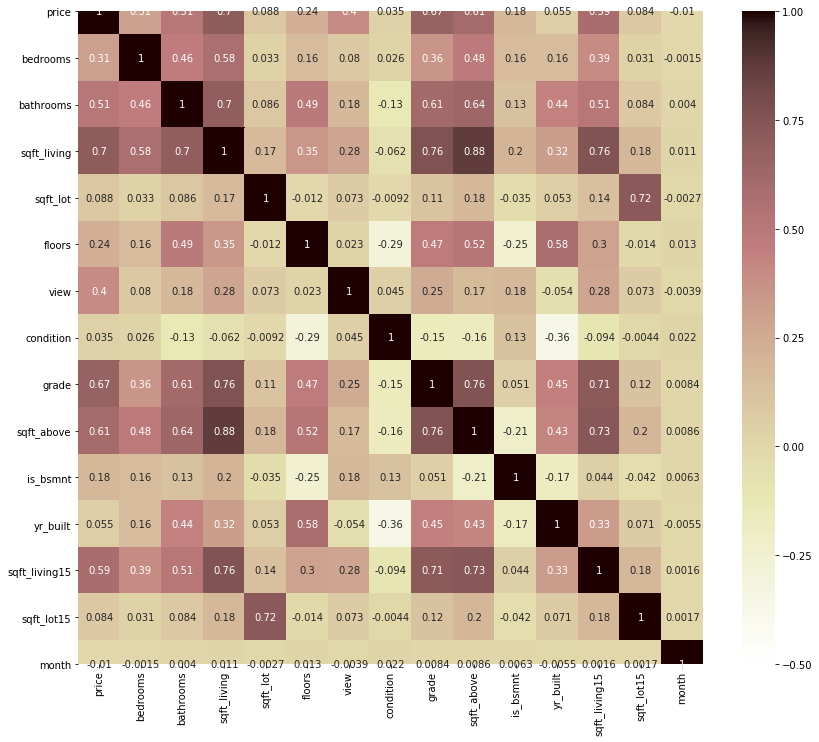

In [40]:
# heatmap with individual annotation for a multicollinearity map
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

In [41]:
df.drop('sqft_living', axis=1, inplace=True)

In [42]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month
count,2.108000e+04,21080.000000,21080.000000,2.108000e+04,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000
mean,5.402607e+05,3.372486,1.750332,1.507894e+04,1.445636,0.233349,3.409867,7.657590,1789.068691,0.392932,1971.019545,1986.983539,12733.613994,6.576471
std,3.667446e+05,0.924988,0.733371,4.117510e+04,0.551262,0.765099,0.650615,1.173673,828.371814,0.488413,29.321911,685.539809,27149.834582,3.114166
min,7.800000e+04,1.000000,0.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.000000,7.620000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7626.000000,6.000000
75%,6.450000e+05,4.000000,2.000000,1.069875e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1.000000,1997.000000,2360.000000,10089.000000,9.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,9410.000000,1.000000,2015.000000,6210.000000,871200.000000,12.000000


sqft_above:  AxesSubplot(0.125,0.125;0.775x0.755)


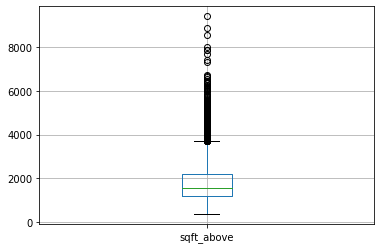

In [46]:
print("sqft_above: ",df.boxplot(column = 'sqft_above'))

sqft_living15:  AxesSubplot(0.125,0.125;0.775x0.755)


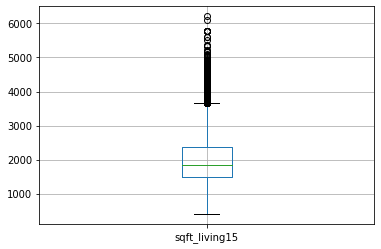

In [47]:
print("sqft_living15: ",df.boxplot(column = 'sqft_living15'))

sqft_lot15:  AxesSubplot(0.125,0.125;0.775x0.755)


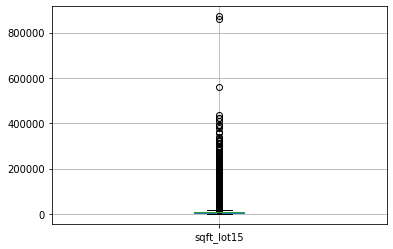

In [48]:
print("sqft_lot15: ",df.boxplot(column = 'sqft_lot15'))

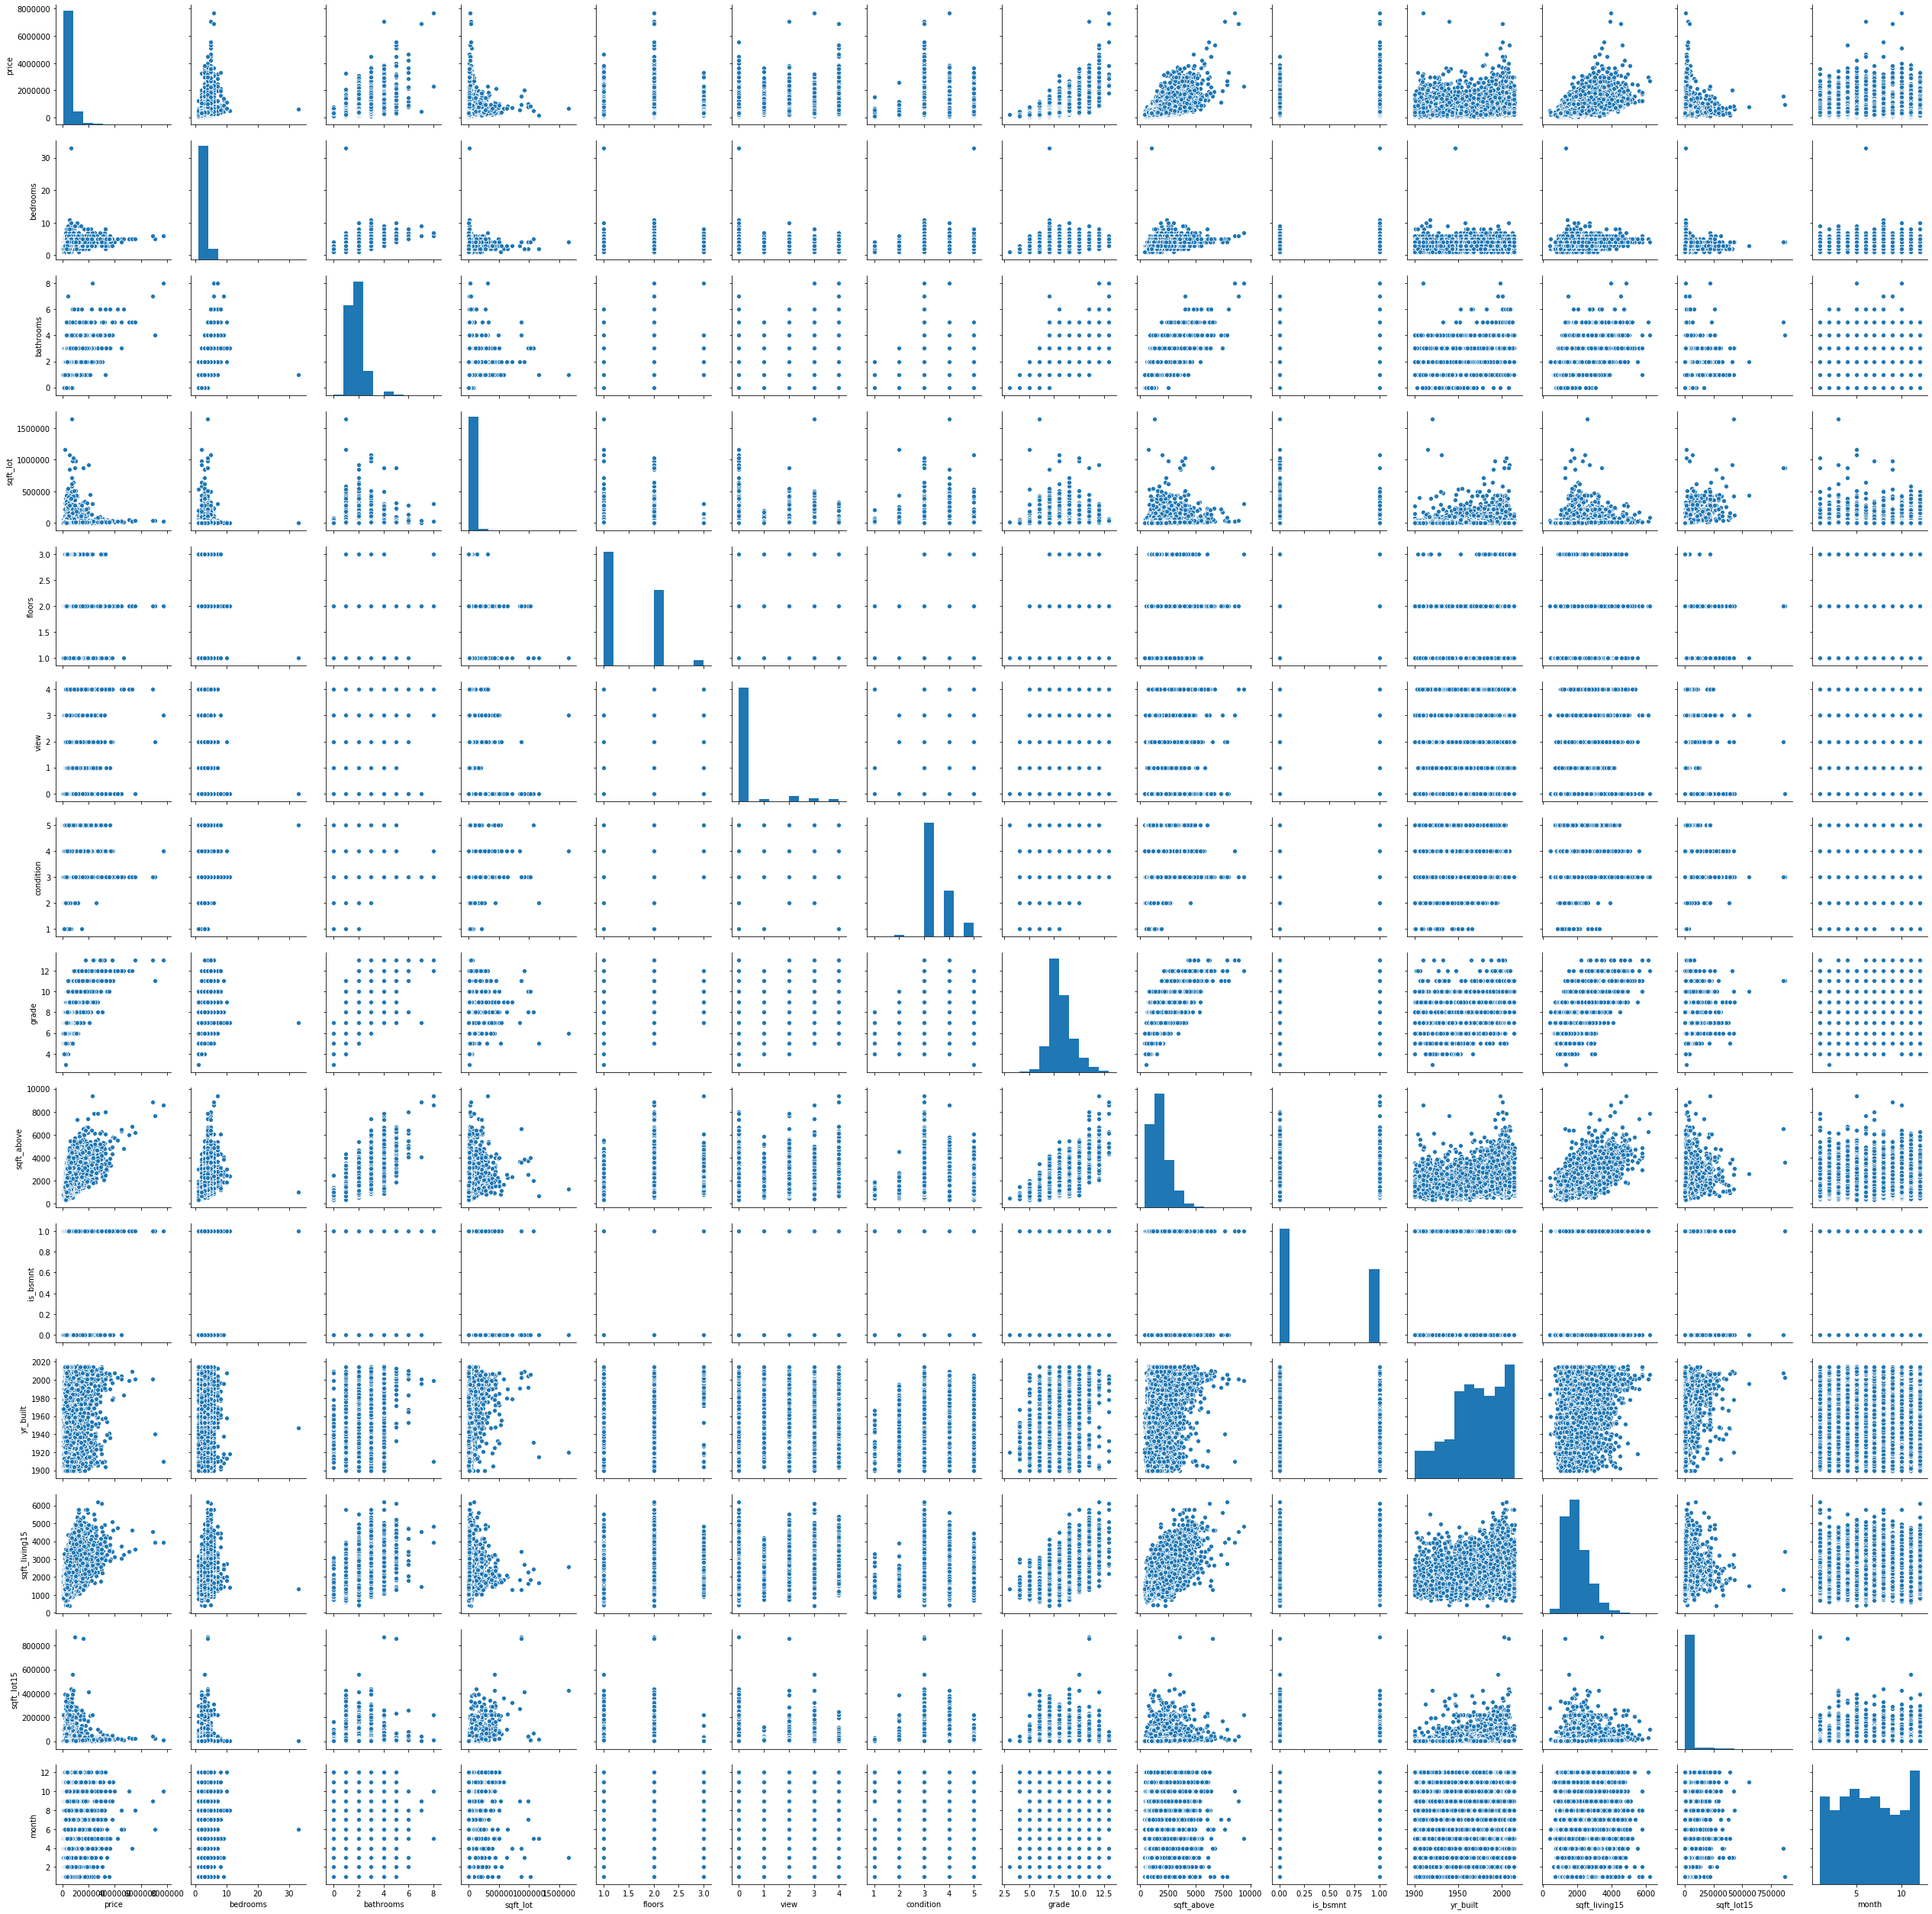

In [49]:
#creates a scatter matrix visualization between all features
sns.pairplot(df);

###### REMOVE OUTLIERS

In [50]:
df.reindex(axis=0)
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
0,221900,3,1,5650,1,0,3,7,1180,0,1955,1340,5650,10,Seattle
1,538000,3,2,7242,2,0,3,7,2170,1,1951,1690,7639,12,Seattle
2,180000,2,1,10000,1,0,3,6,770,0,1933,2720,8062,2,Kenmore
3,604000,4,3,5000,1,0,5,7,1050,1,1965,1360,5000,12,Seattle
4,510000,3,2,8080,1,0,3,8,1680,0,1987,1800,7503,2,Sammamish


In [51]:
df.loc[df['bedrooms']>15]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
15518,640000,33,1,6000,1,0,5,7,1040,1,1947,1330,4700,6,Seattle


In [52]:
df.loc[df['sqft_lot15']>500000]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
9509,937500,4,4,871200,2,0,3,11,3605,1,2003,3420,871200,1,Carnation
13177,790000,3,2,432036,1,3,3,10,2640,0,1996,1500,560617,11,Enumclaw
20010,1600000,4,5,871200,2,2,3,11,6530,0,2008,1280,858132,4,Carnation


In [53]:
df.loc[df['price']>6000000]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
3846,7060000,5,4,37325,2,2,3,11,7680,1,1940,3930,25449,6,Bellevue
7105,7700000,6,8,27600,2,3,4,13,8570,1,1910,3940,8800,10,Seattle
9059,6890000,6,7,31374,2,4,3,13,8860,1,2001,4540,42730,9,Medina


In [54]:
df.loc[df['sqft_lot']>1000000]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
1687,700000,4,1,1651359,1,3,4,6,1300,0,1920,2560,425581,3,Enumclaw
7489,542500,5,3,1074218,1,0,5,8,2010,1,1931,2450,68825,5,Issaquah
7610,855000,4,3,1024068,2,0,3,10,4030,0,2006,1830,11700,1,North_Bend
16940,190000,2,1,1164794,1,0,2,5,710,0,1915,1680,16730,5,Carnation


###### DROP THE ROWS WITH OUTLIERS

In [55]:
df.drop(index=[15518, 9509, 13177, 20010, 3846, 7105, 9059, 1687, 7489, 7610, 16940], inplace = True)

In [56]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [59]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,is_bsmnt,yr_built,sqft_living15,sqft_lot15,month,city
0,221900,3,1,5650,1,0,3,7,1180,0,1955,1340,5650,10,Seattle
1,538000,3,2,7242,2,0,3,7,2170,1,1951,1690,7639,12,Seattle
2,180000,2,1,10000,1,0,3,6,770,0,1933,2720,8062,2,Kenmore
3,604000,4,3,5000,1,0,5,7,1050,1,1965,1360,5000,12,Seattle
4,510000,3,2,8080,1,0,3,8,1680,0,1987,1800,7503,2,Sammamish


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21069 entries, 0 to 21142
Data columns (total 15 columns):
price            21069 non-null int64
bedrooms         21069 non-null int64
bathrooms        21069 non-null int64
sqft_lot         21069 non-null int64
floors           21069 non-null int64
view             21069 non-null int64
condition        21069 non-null int64
grade            21069 non-null int64
sqft_above       21069 non-null int64
is_bsmnt         21069 non-null int64
yr_built         21069 non-null int64
sqft_living15    21069 non-null int64
sqft_lot15       21069 non-null int64
month            21069 non-null int64
city             21069 non-null object
dtypes: int64(14), object(1)
memory usage: 2.6+ MB


###### CATEGORICAL DATA

In [60]:
df.view = df.view.astype('category', inplace = True)
df.grade = df.grade.astype('category', inplace = True)
df.condition = df.condition.astype('category', inplace = True)
df.floors = df.floors.astype('category', inplace = True)
df.is_bsmnt = df.is_bsmnt.astype('category', inplace = True)
df.bathrooms = df.bathrooms.astype('category', inplace = True)
df.bedrooms = df.bedrooms.astype('category', inplace = True)
df.month = df.bedrooms.astype('category', inplace = True)

In [61]:
#one hot encode categorized features and save as its own df
df = pd.get_dummies(df)

In [62]:
#check data to ensure changes were made
df.head()

,price,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,221900,5650,1180,1955,1340,5650,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,538000,7242,2170,1951,1690,7639,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,180000,10000,770,1933,2720,8062,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,5000,1050,1965,1360,5000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,510000,8080,1680,1987,1800,7503,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
df.to_csv('df_clean.csv', index = False)

###### SCALE CONTINOUS DATA

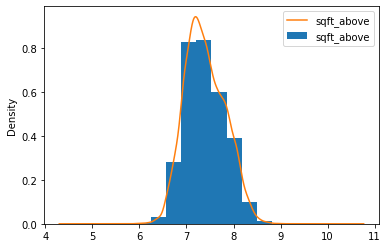

In [64]:
df['sqft_above'] = np.log(df['sqft_above'])
df['sqft_above'].plot.hist(density = True)
df['sqft_above'].plot.kde(label = 'sqft_above')
plt.legend()
plt.show()

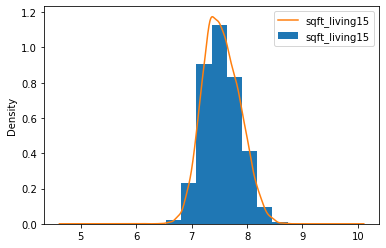

In [65]:
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_living15'].plot.hist(density = True)
df['sqft_living15'].plot.kde(label = 'sqft_living15')
plt.legend()
plt.show()

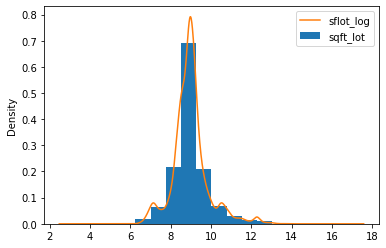

In [66]:
df['sqft_lot'] = np.log(df['sqft_lot'])
df['sqft_lot'].plot.hist(density = True)
df['sqft_lot'].plot.kde(label = 'sflot_log')
plt.legend()
plt.show()

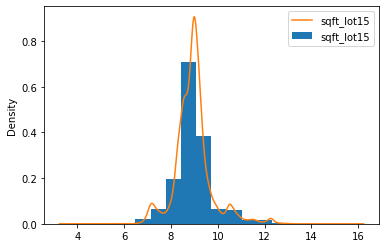

In [67]:
df['sqft_lot15'] = np.log(df['sqft_lot15'])
df['sqft_lot15'].plot.hist(density = True)
df['sqft_lot15'].plot.kde(label = 'sqft_lot15')
plt.legend()
plt.show()

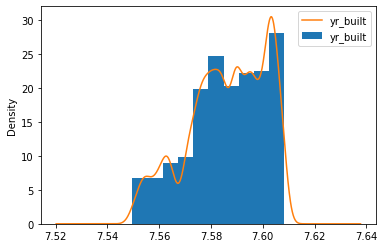

In [68]:
df['yr_built'] = np.log(df['yr_built'])
df['yr_built'].plot.hist(density = True)
df['yr_built'].plot.kde(label = 'yr_built')
plt.legend()
plt.show()

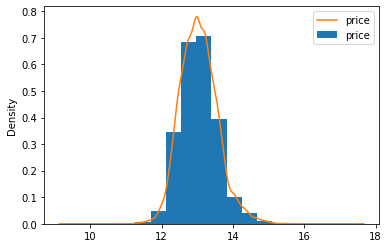

In [69]:
df['price'] = np.log(df['price'])
df['price'].plot.hist(density = True)
df['price'].plot.kde(label = 'price')
plt.legend()
plt.show()

###### QUESTIONS TO ASK

2. Is there any findings on location of home that is valuable to an investor?

3. Is there any findings on time of year that is valuable to an investor?

###### FIT A MODEL

This first model (ordinary least squares) fit will provide us the individual features results against the target 'price'.

In [70]:
# statsmodels linear regression model
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula = f, data = df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


Housing: Price~sqft_lot
------------------------------
['sqft_lot', 0.018717292569577326, 12.327438629437259, 0.0801260891250355, 1.467474782953987e-88]
Housing: Price~sqft_above
------------------------------
['sqft_above', 0.34160007807448856, 7.722507830173494, 0.7200982410932305, 0.0]
Housing: Price~yr_built
------------------------------
['yr_built', 0.006407900477009121, -8.323192226639042, 2.8170758114391523, 2.6636014243629084e-31]
Housing: Price~sqft_living15
------------------------------
['sqft_living15', 0.3691093688004906, 5.695290689004935, 0.9751772727486809, 0.0]
Housing: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.014996150711791945, 12.334695269617935, 0.0795721876729929, 3.3822935647580317e-71]
Housing: Price~bedrooms_1
------------------------------
['bedrooms_1', 0.0076459994945299314, 13.052095181914261, -0.48466225709357336, 4.826959195699051e-37]
Housing: Price~bedrooms_2
------------------------------
['bedrooms_2', 0.03216705867485947, 13.

['month_6', 0.005440600184354771, 13.043387043524126, 0.3523305296016671, 8.163504663973864e-27]
Housing: Price~month_7
------------------------------
['month_7', 0.0015949381342246216, 13.046833515443074, 0.5079877715665909, 6.67737531508691e-09]
Housing: Price~month_8
------------------------------
['month_8', 0.0008226214802933285, 13.047327110710963, 0.6067693136638583, 3.130508306748287e-05]
Housing: Price~month_9
------------------------------
['month_9', 0.00034242997685562937, 13.047537425331406, 0.5761470565007742, 0.007229534393541355]
Housing: Price~month_10
------------------------------
['month_10', 0.00014620712240442924, 13.047625695499404, 0.5323727232382981, 0.0792460279294072]
Housing: Price~month_11
------------------------------
['month_11', 2.2305543926348648e-06, 13.047696094197654, 0.1138879963597925, 0.8283861659312167]
Housing: Price~city_Auburn
------------------------------
['city_Auburn', 0.04356272268845274, 13.070715233322499, -0.5454177212879278, 4.627103

First, we will run a model with all of the continuous data

In [71]:
formula = 'price~sqft_above+sqft_living15+yr_built+sqft_lot15+sqft_lot'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     3972.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:47:32   Log-Likelihood:                -9336.8
No. Observations:               21069   AIC:                         1.869e+04
Df Residuals:                   21063   BIC:                         1.873e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        75.6177      1.485     50.909      0.000      72.706      78.529
sqft_above        0.5409      0.009     58.050      0.000       0.523       0.559
sqft_living15     0.7200      0.012     61.682      0.000       0.697       0.743
yr_built         -9.3607      0.199    -47.100      0.000      -9.750      -8.971
sqft_lot15       -0.0695      0.008     -8.453      0.000      -0.086      -0.053
sqft_lot         -0.0404      0.007     -5.422      0.000      -0.055      -0.026
==============================================================================
Omnibus:                       62.062   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.786
Skew:                           0.078   Prob(JB):                     2.58e-16
Kurtosis:                       3.240   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above shows us that the combination of data results in all data being statistically significant (p<.05) and attribute to about 48% of price predictability (R2 value).

In [72]:
formula = 'price~sqft_above+sqft_living15+yr_built+sqft_lot15+sqft_lot \
+bedrooms_1+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5 \
+bathrooms_2+bathrooms_4+bathrooms_5 \
+floors_1+floors_2+floors_3+view_0+view_1+view_2+view_3+view_4 \
+grade_4+grade_5+grade_6+grade_10+grade_11+grade_12+grade_13 \
+condition_1+condition_2+condition_4+condition_5+is_bsmnt_0+is_bsmnt_1 \
+city_Auburn+city_Enumclaw+city_Enumclaw+city_Federal_Way+city_Kent+city_Kirkland+city_Maple_Valley \
+city_Medina+city_Mercer_Island+city_Redmond+city_Renton+city_Woodinville'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1490.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:48:16   Log-Likelihood:                -1793.1
No. Observations:               21069   AIC:                             3672.
Df Residuals:                   21026   BIC:                             4014.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.3685      0.657     35.546      0.000      22.080      24.657
sqft_above             0.5338      0.009     56.943      0.000       0.515       0.552
sqft_living15          0.3462      0.009     37.996      0.000       0.328       0.364
yr_built              -5.3336      0.177    -30.159      0.000      -5.680      -4.987
sqft_lot15            -0.0564      0.006     -9.688      0.000      -0.068      -0.045
sqft_lot               0.0163      0.005      3.056      0.002       0.006       0.027
bedrooms_1             0.1849      0.026      7.131      0.000       0.134       0.236
bedrooms_2             0.1368      0.017      8.090      0.000       0.104       0.170
bedrooms_3             0.0649      0.016      4.109      0.000       0.034       0.096
bedrooms_4             0.0584      0.016      3.733      0.000       0.028       0.089
bedrooms_5             0.0434      0.016      2.631      0.009       0.011       0.076
bathrooms_2            0.0086      0.004      2.015      0.044       0.000       0.017
bathrooms_4            0.0720      0.016      4.471      0.000       0.040       0.104
bathrooms_5            0.1020      0.042      2.439      0.015       0.020       0.184
floors_1               7.7048      0.217     35.471      0.000       7.279       8.131
floors_2               7.7546      0.219     35.379      0.000       7.325       8.184
floors_3               7.9092      0.221     35.744      0.000       7.475       8.343
view_0                 4.5219      0.132     34.253      0.000       4.263       4.781
view_1                 4.6276      0.132     35.023      0.000       4.369       4.887
view_2                 4.6183      0.132     35.093      0.000       4.360       4.876
view_3                 4.6838      0.132     35.536      0.000       4.425       4.942
view_4                 4.9169      0.132     37.273      0.000       4.658       5.175
grade_4               -0.2781      0.052     -5.342      0.000      -0.380      -0.176
grade_5               -0.2574      0.018    -13.981      0.000      -0.293      -0.221
grade_6               -0.1872      0.007    -25.910      0.000      -0.201      -0.173
grade_10               0.2326      0.009     25.232      0.000       0.215       0.251
grade_11               0.3346      0.015     22.059      0.000       0.305       0.364
grade_12               0.4764      0.030     15.964      0.000       0.418       0.535
grade_13               0.6879      0.082      8.437      0.000       0.528       0.848
condition_1           -0.2455      0.050     -4.868      0.000      -0.344      -0.147
condition_2           -0.1689      0.021     -8.074      0.000      -0.210      -0.128
condition_4            0.0610      0.005     13.279      0.000       0.052       0.070
condition_5            0.1448      0.0

There were a few adds and removals before reaching this model. It has a near 75% predictability and all p-values are statistically significant. This is the best model results I could get. It does have a slight kurtosis skew (above 3.0) and there is a multicollinearity warning. We will run a test,train validation below.

###### Testing Fit Through Recursive Feature Elimination

In [73]:
df1=df.drop('price', axis=1)

In [74]:
#from sklearn.datasets import make_friedman1
predictors=df1
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(predictors, df.price)

In [75]:
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [76]:
selector.ranking_

array([84, 81, 80, 82, 83,  9, 10, 16, 55, 17,  7, 14,  3,  5,  1,  1, 47,
       48, 49, 50, 51, 52, 53, 46, 45, 42, 43, 44, 36, 38, 37, 39, 40, 33,
       35, 34, 32, 31, 27, 30, 29, 28, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       41, 54, 11, 12, 13,  8, 15,  4,  6,  1,  2, 57, 77, 62, 67, 66, 64,
       59, 74, 56, 70, 65, 58, 75, 60, 79, 78, 63, 76, 61, 73, 72, 69, 68,
       71])

In [77]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 1.35041863e+13  1.15234375e-01 -1.35041863e+13]
13.047681472514077


According to the recursive feature elimination test, the categorized floor features were the best fit.

###### Model Validation through Train, Test, Split

This test will determine the validity of our selected model with our selected three features.

In [78]:
#set data 
y = df[["price"]]
X = df[['sqft_above','sqft_living15','yr_built','sqft_lot15','sqft_lot', \
'bedrooms_1','bedrooms_2','bedrooms_3','bedrooms_4','bedrooms_5', \
'bathrooms_2','bathrooms_4','bathrooms_5', \
'floors_1','floors_2','floors_3','view_0','view_1','view_2','view_3','view_4', \
'grade_4','grade_5','grade_6','grade_10','grade_11','grade_12','grade_13', \
'condition_1','condition_2','condition_4','condition_5','is_bsmnt_0','is_bsmnt_1', \
'city_Auburn','city_Enumclaw','city_Enumclaw','city_Federal_Way','city_Kent','city_Kirkland','city_Maple_Valley', \
'city_Medina','city_Mercer_Island','city_Redmond','city_Renton','city_Woodinville']]
#import tools and load test-train-split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16855 4214 16855 4214


In [79]:
#perform regression on train and tests sets
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [80]:
#residuals are also trained and tested
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [81]:
#mean squared error test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.069036
dtype: float64
Test Mean Squarred Error: price    0.071242
dtype: float64


There is not a significant change in the tested and trained mean squared error values which further validates our findings.

###### Additional Insights

###### Home Sales per Month

To gather information on location and time of year, we will pull value counts on those features to find a maximum and minimum range of home sales.

Text(0.5, 1.0, 'Unit Sales by Month')

<Figure size 1296x1296 with 0 Axes>

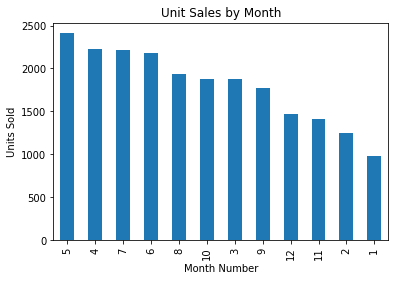

In [82]:
#visualization for presentation
df_raw = pd.read_csv('kc_house_data.csv')
df_raw['month'] = pd.DatetimeIndex(df_raw['date']).month
plt.figure(figsize=(18,18))
df_raw[['month','id']].groupby('month').count().sort_values('id', ascending=False).plot(kind='bar', legend=False);
plt.xlabel('Month Number')
plt.ylabel('Units Sold')
plt.title('Unit Sales by Month')

This visual will let our investor have a better idea of peak selling months to time out flips.

###### SALES BY CITY

Text(0.5, 1.0, 'Unit Sales by City')

<Figure size 1296x1296 with 0 Axes>

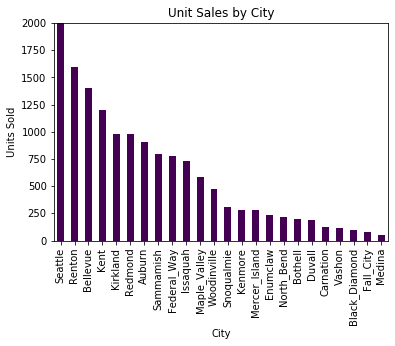

In [83]:
df_raw = pd.read_csv('kc_house_data.csv')
dfc = pd.merge(df_raw,dfz,how='left',on=['zipcode'])
plt.figure(figsize=(18,18))
dfc[['city','id']].groupby('city').count().sort_values('id',ascending=False).plot(kind='bar', cmap = 'viridis',legend=False);
plt.ylim(0,2000)
plt.xlabel('City')
plt.ylabel('Units Sold')
plt.title('Unit Sales by City')

This visual provides us with some interesting insights on popular real estate locations outside of Seattle where investing may be of value.

###### Conclusion

After performing quite a bit of data manipulation, feature engineering and other preprocessing techniques, we were able to get our final model to reach an accuracy of near 75% of price. This model was validated through a MSE test on training and test data.

Three additional questions were asked that may benefit a real estate investor looking in that area. 

1. What are the top three features that attribute to price?
The number of floors attributed most to price.
2. Is there any findings on location of home that is valuable to an investor?
A bar chart and heatmap were created to show unit sales locations.
3. Is there any findings on time of year that is valuable to an investor? 
April-July seem to be the top 4 months for sales in the region according to our visual.
